In [10]:
import os
import hydra
import omegaconf
import tensorflow as tf
from model import UCCModel
from dataset import Dataset

In [11]:
path = "./config.yaml"
cfg = omegaconf.OmegaConf.load(path)

In [13]:
args = cfg.args
num_classes = args.ucc_end - args.ucc_start+1
batch_size = args.num_samples_per_class * num_classes
print(batch_size)
splitted_dataset = Dataset(
    num_instances=args.num_instances, 
    num_samples_per_class=args.num_samples_per_class, 
    object_arr=[0,1,2,3,4,5,6,7,8,9], 
    ucc_start=args.ucc_start, 
    ucc_end=args.ucc_end
    )
samples, [labels,_] = splitted_dataset.next_batch_train()
model = UCCModel(cfg=cfg)
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)

def grad(model, inputs, labels):
    with tf.GradientTape() as tape:
        output_class, reconstruction = model(inputs)
        loss_value = model.training_loss(
            output_class=output_class, 
            labels=labels, 
            inputs=inputs, 
            reconstruction=reconstruction)
        
    return loss_value, tape.gradient(loss_value, model.trainable_variables)

20
x_train shape: (40000, 32, 32, 3)
40000 train samples
10000 val samples
object0:0, num_train:4000, num_val:1000
object1:1, num_train:4000, num_val:1000
object2:2, num_train:4000, num_val:1000
object3:3, num_train:4000, num_val:1000
object4:4, num_train:4000, num_val:1000
object5:5, num_train:4000, num_val:1000
object6:6, num_train:4000, num_val:1000
object7:7, num_train:4000, num_val:1000
object8:8, num_train:4000, num_val:1000
object9:9, num_train:4000, num_val:1000


In [22]:
splitted_dataset.next_batch_train()

([array([[[[-9.0312964e-01, -7.2778052e-01, -5.8585036e-01],
           [-9.5112759e-01, -7.4415427e-01, -5.8585036e-01],
           [-1.1111207e+00, -8.7514430e-01, -6.9626218e-01],
           ...,
           [-8.7113100e-01, -7.1140677e-01, -5.7007724e-01],
           [-9.0312964e-01, -7.6052803e-01, -6.3316971e-01],
           [-9.0312964e-01, -7.6052803e-01, -6.9626218e-01]],
  
          [[-9.9912554e-01, -8.0964929e-01, -7.2780842e-01],
           [-1.0151248e+00, -8.0964929e-01, -6.9626218e-01],
           [-9.3512827e-01, -7.1140677e-01, -5.7007724e-01],
           ...,
           [-8.8713032e-01, -7.4415427e-01, -6.3316971e-01],
           [-9.3512827e-01, -7.7690178e-01, -6.6471595e-01],
           [-8.8713032e-01, -7.2778052e-01, -6.6471595e-01]],
  
          [[-1.0791221e+00, -9.2426556e-01, -7.7512777e-01],
           [-1.1111207e+00, -9.2426556e-01, -7.5935465e-01],
           [-1.0791221e+00, -8.9151806e-01, -7.1203530e-01],
           ...,
           [-9.9912554e-01, -

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

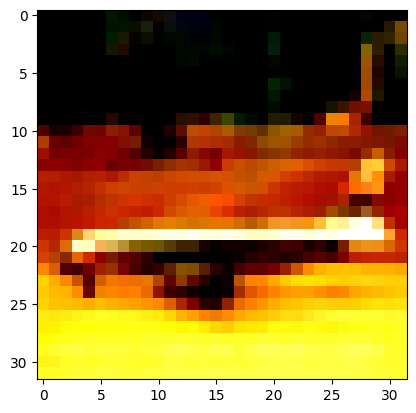

In [21]:
import matplotlib.pyplot as plt

for s in samples:
    plt.imshow(s)